In [2]:
# Load dataset
import pandas as pd

df = pd . read_csv ('Downloads/BTC-Daily.csv')

# Remove duplicate rows
df = df . drop_duplicates ()

In [4]:
def mean_normalization ( X) :
    N = len( X )
    maxi = np .max ( X )
    mini = np .min ( X )
    avg = np . mean ( X )
    X = (X - avg ) / ( maxi - mini )
    X_b = np . c_ [ np . ones (( N , 1) ) , X ]
    return X_b , maxi , mini , avg



2014-11-28 to 2022-03-01


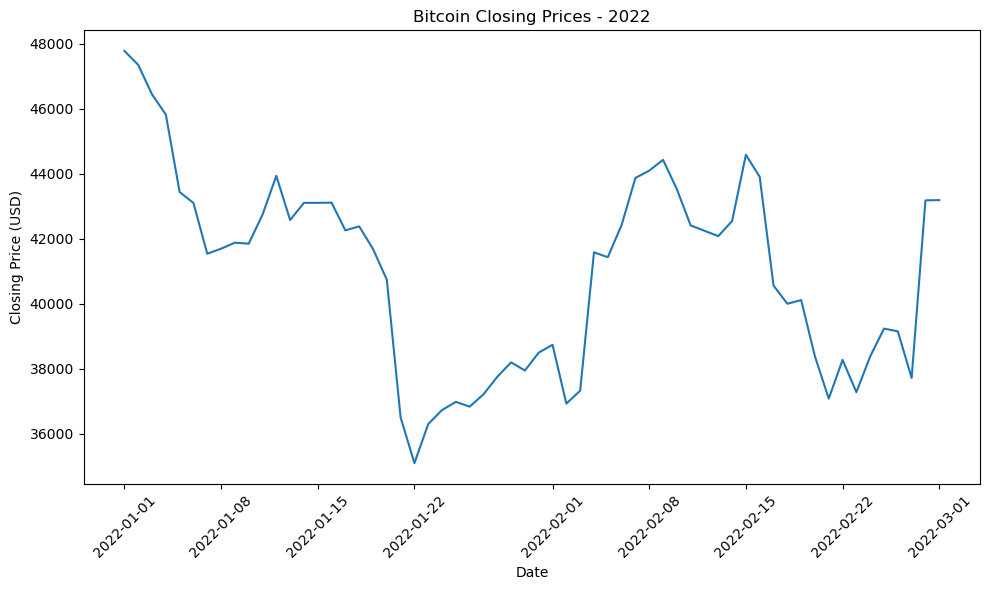

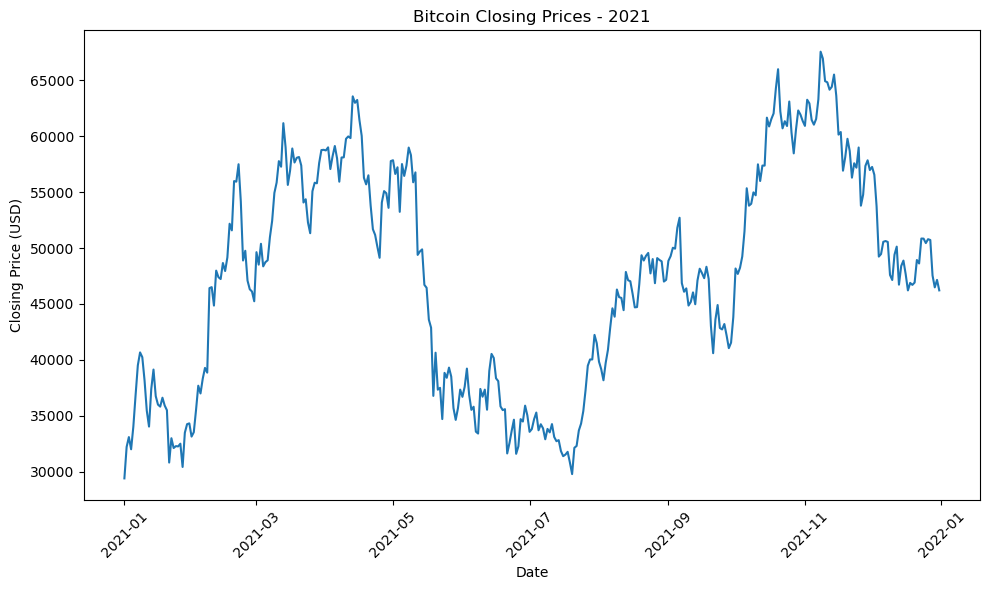

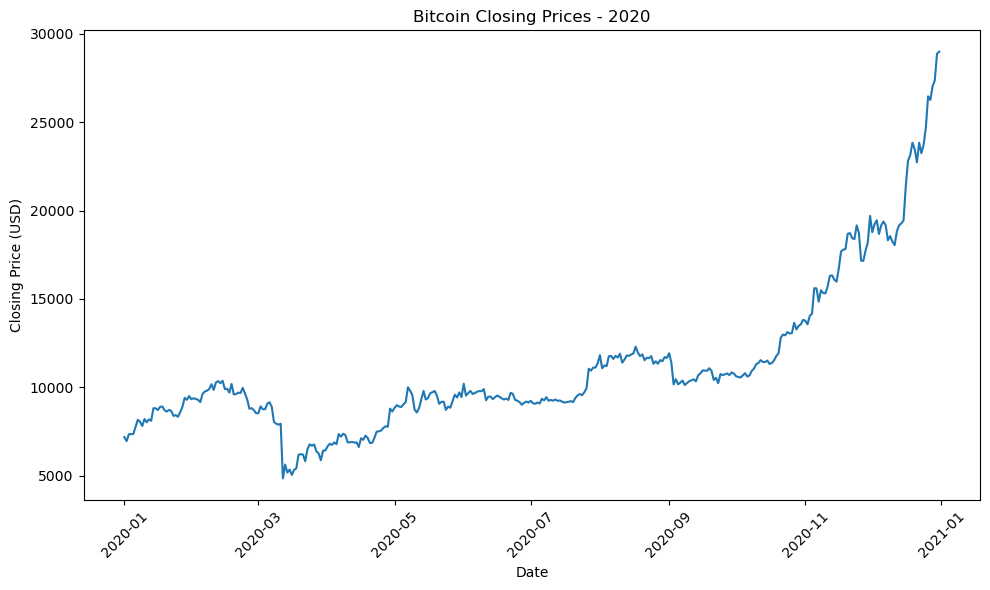

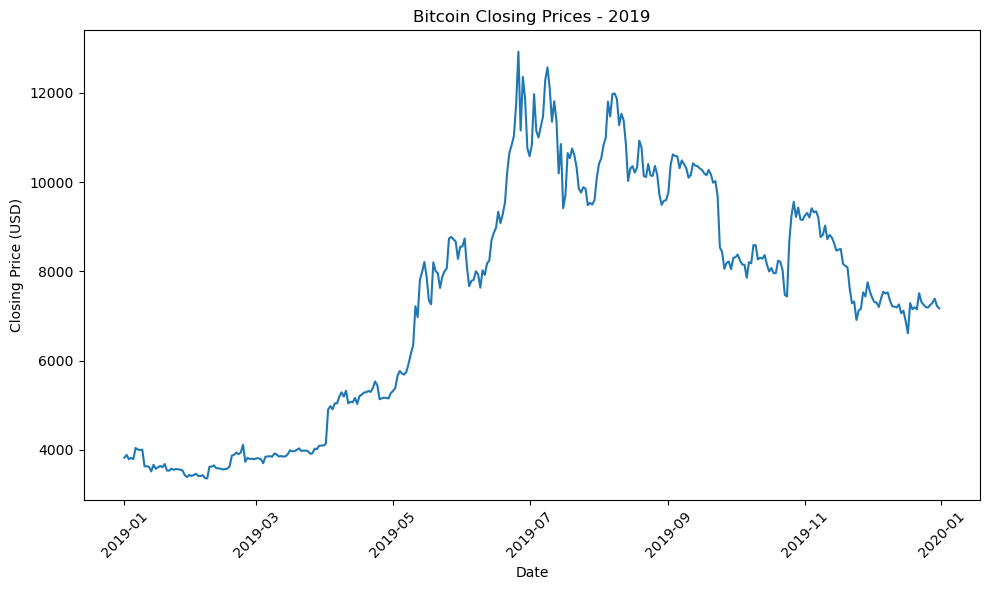

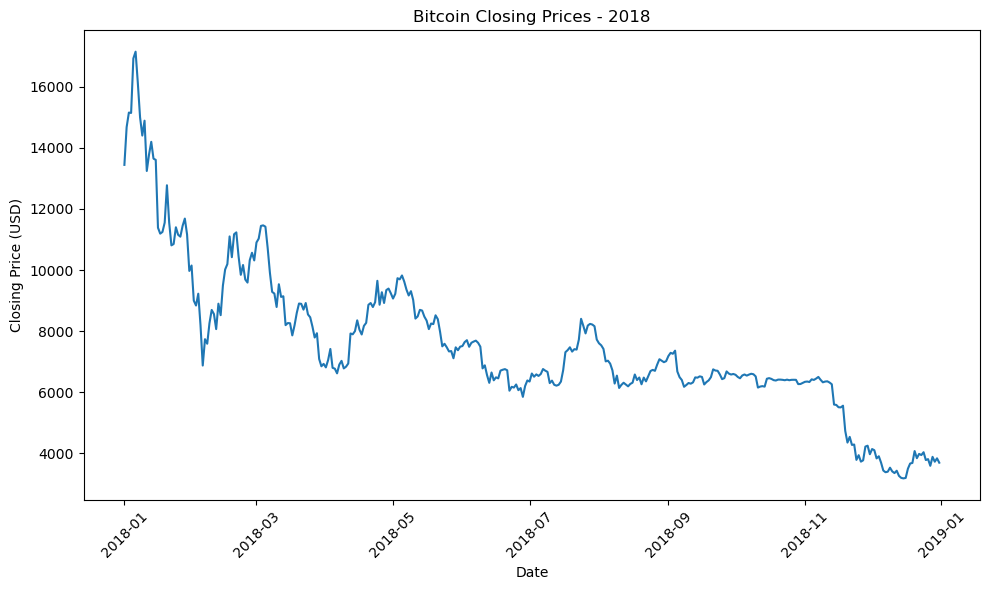

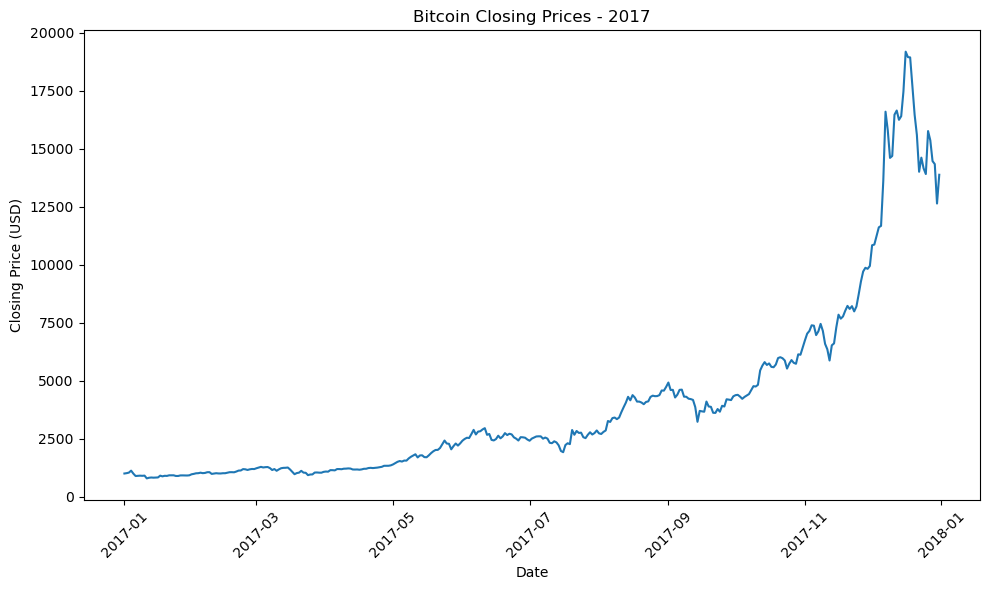

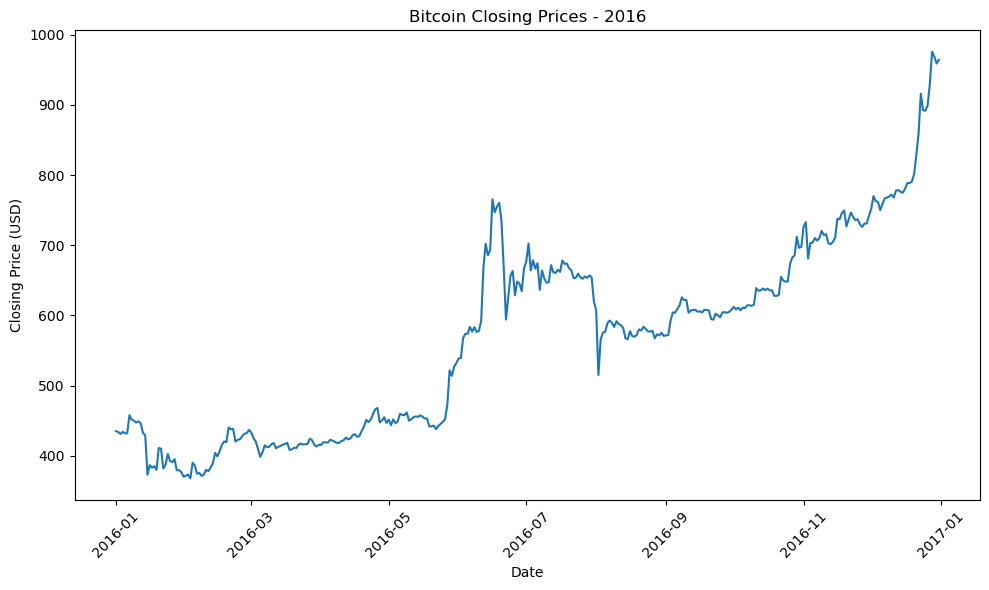

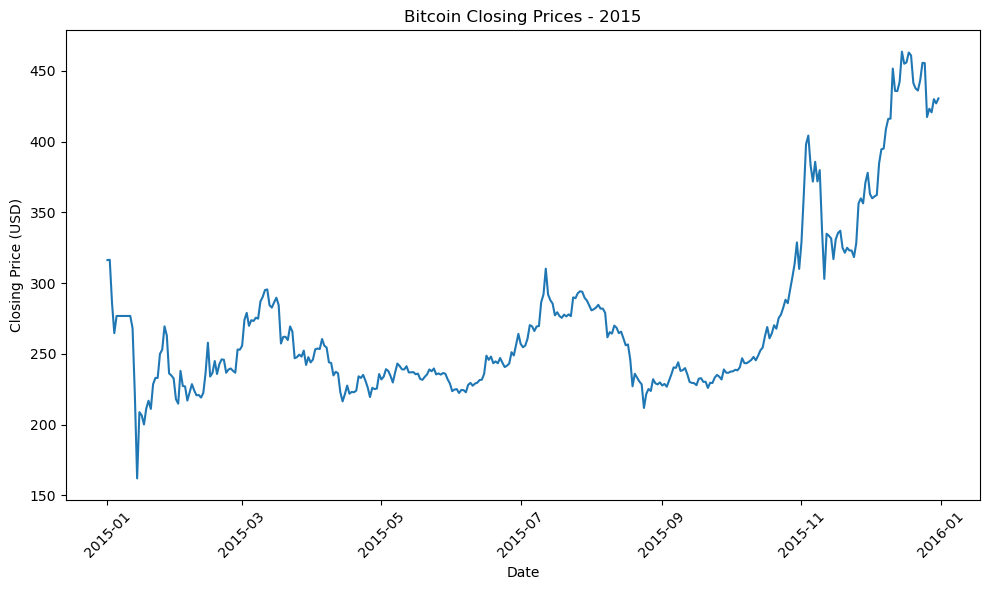

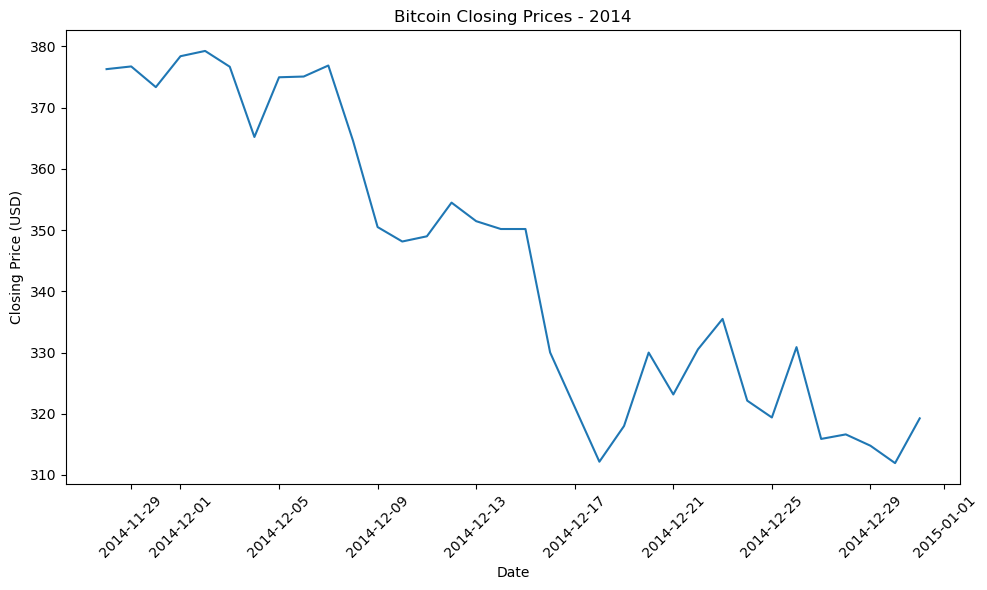

In [6]:
import matplotlib.pyplot as plt
# Range of dates covered
df ['date'] = pd . to_datetime ( df ['date'])
date_range = str( df ['date']. dt . date .min () ) + ' to ' +str ( df ['date']. dt . date . max ())
print ( date_range )

# ####### Your code here ########
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Get unique years
unique_years = df['year'].unique()

# Create a new dataframe with all combinations of year, month, and day
year_month_day = pd.DataFrame({
    'year': df['year'],
    'month': df['month'],
    'day': df['day']
}).drop_duplicates()
for year in unique_years :
# ####### Your code here ########

    merged_data = pd . merge ( year_month_day ,  df[df['year'] == year] , on =[ 'year', 'month', 'day'] , how ='left')
    # Plot
    plt . figure ( figsize =(10 , 6) )
    plt . plot ( merged_data ['date'] , merged_data ['close'])
    plt . title ( f'Bitcoin Closing Prices - { year }')
    plt . xlabel ('Date')
    plt . ylabel ('Closing Price (USD)')
    plt . xticks ( rotation =45)
    plt . tight_layout ()
    plt . show ()

In [8]:
! pip install mplfinance

C:\Users\MR DU\AppData\Local\Temp\ipykernel_3324\2684175682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered ['date'] = df_filtered ['date']. map( mdates . date2num )


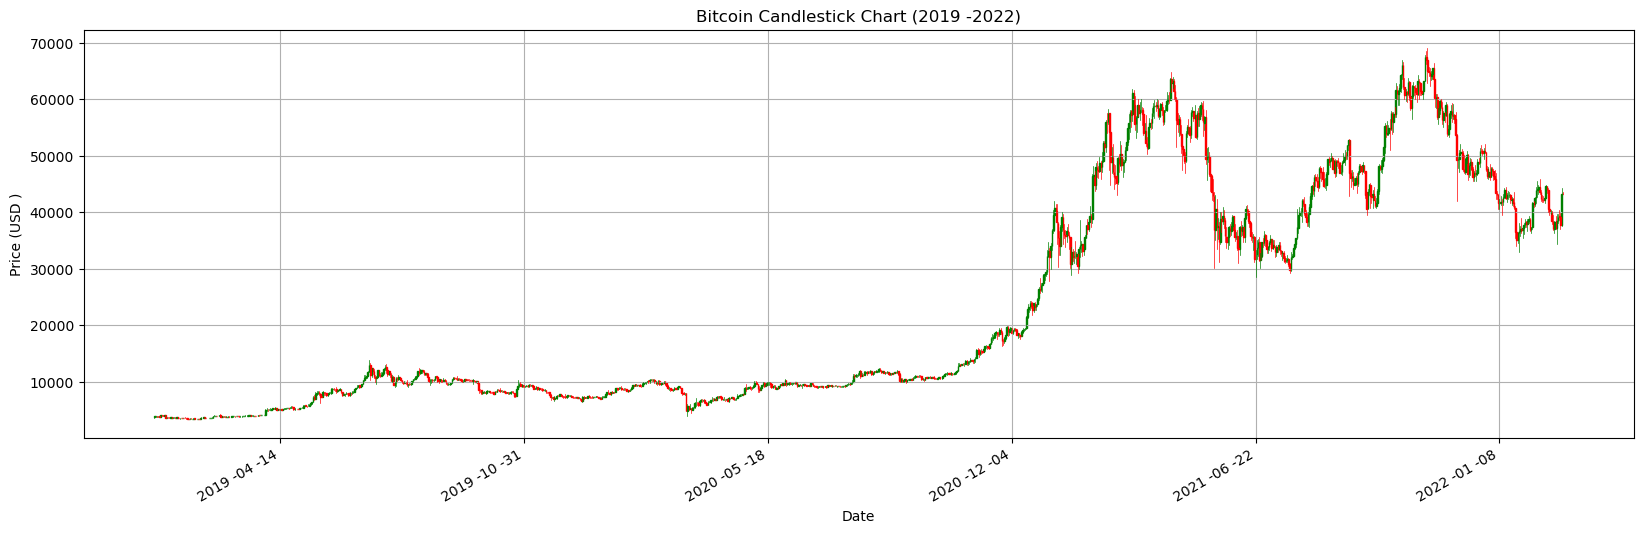

In [9]:
import matplotlib . pyplot as plt
import matplotlib . dates as mdates
from mplfinance . original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019 -2022
df_filtered = df [( df ['date'] >= '2019 -01 -01') & ( df ['date'] <= '2022 -12 -31') ]

# Convert date to matplotlib format
df_filtered ['date'] = df_filtered ['date']. map( mdates . date2num )

# Create the candlestick chart
fig , ax = plt . subplots ( figsize =(20 , 6) )

candlestick_ohlc ( ax , df_filtered [[ 'date', 'open','high','low', 'close']]. values
, width =0.6 , colorup ='g', colordown ='r')

ax . xaxis . set_major_formatter ( mdates . DateFormatter ('%Y -%m -%d') )
fig . autofmt_xdate ()

plt . title ('Bitcoin Candlestick Chart (2019 -2022)')
plt . xlabel ('Date')
plt . ylabel ('Price (USD )')
plt . grid ( True )

# Save the plot as a PDF
plt . savefig ('bitcoin_candlestick_2019_2022 .pdf')

plt . show ()

In [66]:
import numpy as np

def predict(X, w, b):
    """Predict the output using the linear model."""
    return np.dot(X, w) + b

def gradient(y_hat, y, x):
    """Calculate the gradient of the loss function with respect to the weights and bias."""
    # Compute the loss
    loss = (y_hat - y.flatten()) ** 2
    # Derivative of the loss with respect to predictions
    dloss = 2 * (y_hat - y.flatten())
    # Compute gradients for weights and bias
    dw = np.dot(x.T, dloss) / len(y)
    db = np.sum(dloss) / len(y)
    # Compute mean squared error cost
    cost = np.sum(loss) / len(y)
    
    return dw, db, cost

def update_weight(w, b, lr, dw, db):
    """Update the weights and bias using the computed gradients."""
    w_new = w - lr * dw
    b_new = b - lr * db
    
    return w_new, b_new


In [68]:
from sklearn . preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scalar = StandardScaler ()

## Your Code here ##

y=df['close']
X = df[['open', 'high', 'low']] 
X=scalar.fit_transform(X)

y= scalar.fit_transform(y.values.reshape(-1, 1))
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size =0.3 ,
random_state =42 , shuffle = True )


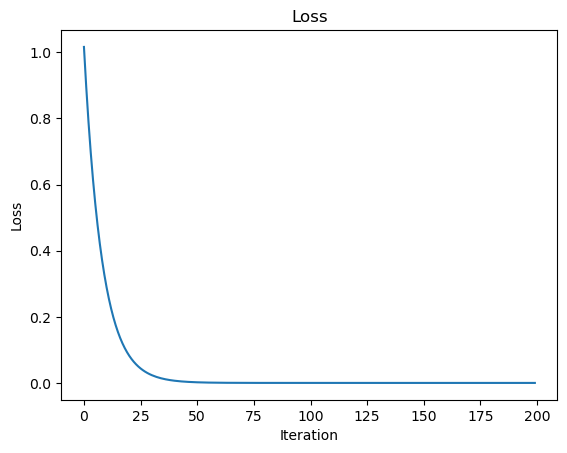

In [70]:
import numpy as np
def linear_regression_vectorized (X , y , learning_rate =0.01 , num_iterations =200) :
    n_samples , n_features = X . shape
    w = np . zeros ( n_features ) # Initialize weights
    b = 0 # Initialize bias
    losses = []
    
    # ##### Your code here #####
    for _ in range ( num_iterations ) :
        y_hat = predict (X , w , b )
        dw , db , cost = gradient ( y_hat , y , X )
        w , b = update_weight (w , b , learning_rate , dw , db )
        losses . append ( cost )
                         
    return w , b , losses

w , b , losses = linear_regression_vectorized ( X_train  , y_train ,
learning_rate =0.01 , num_iterations =200)

plt . plot ( losses )
plt . xlabel ('Iteration')
plt . ylabel ('Loss')
plt . title ('Loss')
plt . show ()

In [72]:
from sklearn . metrics import r2_score

# Make predictions on the test set
y_pred = predict ( X_test , w , b )

# Calculate RMSE
rmse = np . sqrt ( np . mean (( y_pred - y_test ) ** 2) )

# Calculate MAE
mae = np . mean ( np .abs ( y_pred - y_test ) )

# Calculate MAPE
mape = np . mean ( np . abs (( y_test - y_pred ) / y_test )) * 100


# Calculate R- squared on training data
y_train_pred = predict ( X_train , w , b )
train_accuracy = r2_score ( y_train , y_train_pred )

# Calculate R- squared on testing data
test_accuracy = r2_score ( y_test , y_pred )

print (" Root Mean Square Error ( RMSE ):", round ( rmse , 4) )
print (" Mean Absolute Error ( MAE):", round ( mae , 4) )
print (" Training Accuracy (R- squared ):", round ( train_accuracy , 4) )
print (" Testing Accuracy (R- squared ):", round ( test_accuracy , 4) )

 Root Mean Square Error ( RMSE ): 1.3867
 Mean Absolute Error ( MAE): 0.9168
 Training Accuracy (R- squared ): 0.9989
 Testing Accuracy (R- squared ): 0.9991


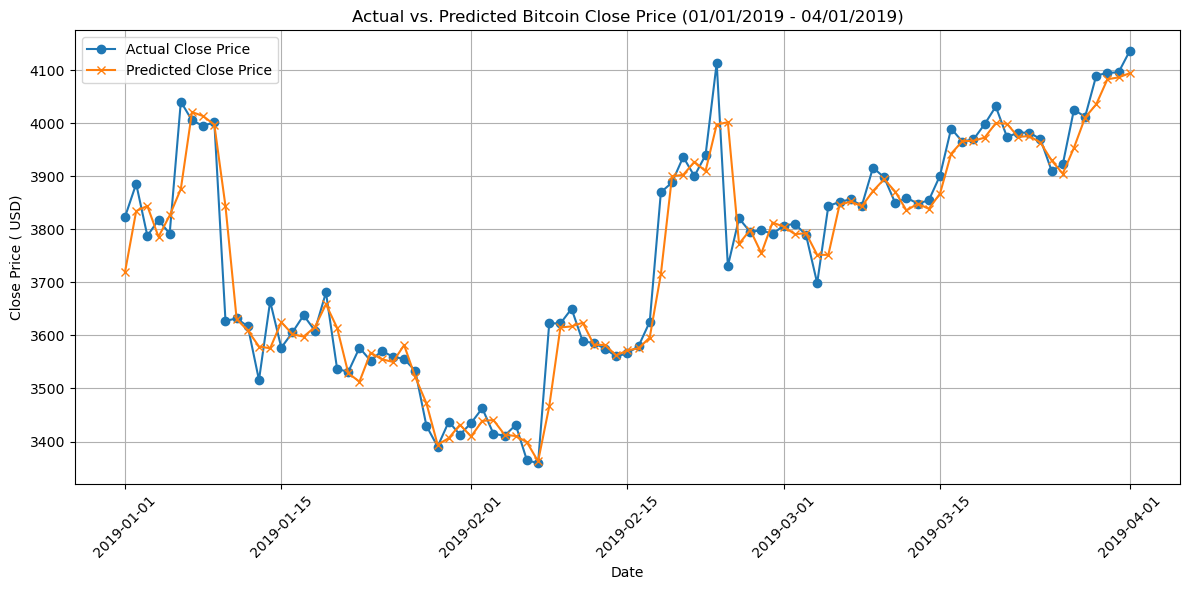

In [74]:
# Filter data for 2019 -01 -01 to 2019 -04 -01
df_2019_q1 = df [( df ['date'] >= '2019 -01 -01') & ( df ['date'] <= '2019 -04 -01') ]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1 [["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1 ["close"]

y_2019_q1_pred = predict ( X_2019_q1 , w , b )

# Create the plot
plt . figure ( figsize =(12 , 6) )
plt . plot ( df_2019_q1 ['date'] , y_2019_q1_actual , label ='Actual Close Price', marker
='o')
plt . plot ( df_2019_q1 ['date'] , y_2019_q1_pred , label ='Predicted Close Price',
marker ='x')
plt . title ('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt . xlabel ('Date')
plt . ylabel ('Close Price ( USD)')
plt . legend ()
plt . grid ( True )
plt . xticks ( rotation =45)
plt . tight_layout ()
plt . show ()